In [ ]:
ls

 Ann_Regression_analysis_Grid_search.ipynb
 Assignment1_Fashion_Mnist.ipynb
 Batch_normalization_Keras.ipynb
 Convolutional_Neural_Network_World_1.ipynb
 full_mnist_model.h5
 June_6_batch.ipynb
 log/
 Mnist_dataset_ANN.ipynb
'Mnist_dataset_ANN_With Callbacks.ipynb'
'Mnist_with_5_different_Networks .ipynb'
 model_best_fashion.h5
 model_ckpt.h5
 my_logs/
 pretrained_mnist_model.h5
'Regression_Model_Using Keras.ipynb'
 Trained_model/


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Ineuron_Practical')

In [ ]:
ls

 Ann_Regression_analysis_Grid_search.ipynb
 Assignment1_Fashion_Mnist.ipynb
 Batch_normalization_Keras.ipynb
 Convolutional_Neural_Network_World_1.ipynb
 full_mnist_model.h5
 June_6_batch.ipynb
 log/
 Mnist_dataset_ANN.ipynb
'Mnist_dataset_ANN_With Callbacks.ipynb'
'Mnist_with_5_different_Networks .ipynb'
 model_best_fashion.h5
 model_ckpt.h5
 my_logs/
 pretrained_mnist_model.h5
'Regression_Model_Using Keras.ipynb'
 Trained_model/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

In [ ]:
mnist = tf.keras.datasets.mnist.load_data()

In [ ]:
(xtrain,ytrain),(xtest,ytest)=mnist

In [ ]:
print(xtrain.shape,
ytrain.shape,
xtest.shape,
ytest.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
xtrain_scaled = xtrain/255.
#ytrain_scaled = ytrain/255.
xtest_scaled  = xtest/255.

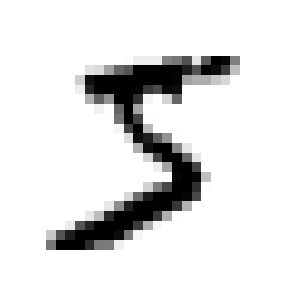

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(xtrain[0],cmap='binary')
plt.axis('off')
plt.show()

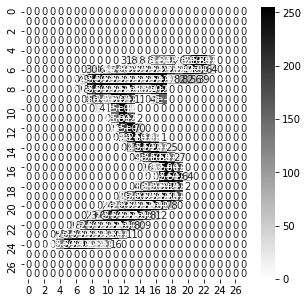

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(xtrain[0],cmap='binary',annot=True)

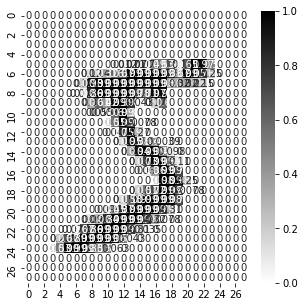

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(xtrain_scaled[0],cmap='binary',annot=True)

In [ ]:
from keras.utils import np_utils

num_classes = 10 
# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(ytrain[:10])

# one-hot encode the labels
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(ytrain, num_classes)
y_test = np_utils.to_categorical(ytest, num_classes)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
# input image dimensions 28x28 pixel images. 
img_rows, img_cols = 28, 28

X_train = xtrain_scaled.reshape(xtrain.shape[0], img_rows, img_cols, 1)
X_test = xtest_scaled.reshape(xtest.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print('input_shape: ', input_shape)
print('x_train shape:', X_train.shape)

input_shape:  (28, 28, 1)
x_train shape: (60000, 28, 28, 1)


In [ ]:
Model_name = []
Model_acc  = []

In [ ]:
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPool2D,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping


## Model 1 with only 1 Convolution Layer

In [ ]:
model1 = Sequential()
#Step 2- Adding a Convolution Layer
model1.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu',kernel_initializer='he_normal',input_shape=(28,28,1)))
#step 3- Adding a Maxpooling layer
model1.add(MaxPooling2D(pool_size = (2, 2)))
#Step 4 - Flattening the data
model1.add(Flatten())

# Step 5 - Full connection
model1.add(Dense(128, activation = 'relu'))

model1.add(Dense(10, activation = 'softmax'))

model1.summary()

# Compiling the CNN
model1.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
Early_stopping = EarlyStopping(patience=10,verbose=1,restore_best_weights=True)
hist = model1.fit(X_train, y_train, batch_size=64, epochs=100,
          validation_split=0.2, callbacks=[checkpointer,Early_stopping])
          #verbose=2, shuffle=True)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 804,554
Trainable params: 804,554
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
750/750 [==============================] - 3s 4ms/step - loss: 0.1777 - accuracy: 0.9454 - val_loss: 

In [ ]:
# evaluate test accuracy
score1 = model1.evaluate(X_test, y_test, verbose=0)
accuracy1 = 100*score1[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy1)

Test accuracy: 98.4800%


In [ ]:
Model_name.append('With 1 Convolution Layer')
Model_acc.append(accuracy1)

In [ ]:
print(Model_name,Model_acc)

['With 1 Convolution Layer'] [98.47999811172485]


# Model 2 with 2 Convolution Layer

In [ ]:
model2 = Sequential()
#Step 2- Adding a Convolution Layer
model2.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu',kernel_initializer='he_normal',input_shape=(28,28,1)))
model2.add(Conv2D(16, kernel_size=(3, 3), padding='same',activation='relu',kernel_initializer='he_normal'))
#step 3- Adding a Maxpooling layer
model2.add(MaxPooling2D(pool_size = (2, 2)))
#Step 4 - Flattening the data
model2.add(Flatten())

# Step 5 - Full connection
model2.add(Dense(128, activation = 'relu'))

model2.add(Dense(10, activation = 'softmax'))

model2.summary()

# Compiling the CNN
model2.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
Early_stopping = EarlyStopping(patience=10,verbose=1,restore_best_weights=True)
hist = model2.fit(X_train, y_train, batch_size=128, epochs=100,
          validation_split=0.2, callbacks=[checkpointer,Early_stopping],
          verbose=2, shuffle=True)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 28, 28, 16)        4624      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               401536    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 407,770
Trainable params: 407,770
Non-trainable params: 0
_______________________________________________

In [ ]:
# evaluate test accuracy
score2 = model2.evaluate(X_test, y_test, verbose=0)
accuracy2 = 100*score2[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy2)



Test accuracy: 98.7800%


In [ ]:
Model_name.append('With 2 Convolution Layer')
Model_acc.append(accuracy2)

# Model3 with More than 2 convolution and maxpooling layers

In [ ]:
model3 = Sequential()
#Step 2- Adding a Convolution Layer
model3.add(Conv2D(64, kernel_size=(3, 3), padding='same',activation='relu',kernel_initializer='he_normal',input_shape=(28,28,1)))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu',kernel_initializer='he_normal'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Conv2D(16, kernel_size=(3, 3), padding='same',activation='relu',kernel_initializer='he_normal'))
#step 3- Adding a Maxpooling layer
model3.add(MaxPooling2D(pool_size = (2, 2)))
#Step 4 - Flattening the data
model3.add(Flatten())

# Step 5 - Full connection
model3.add(Dense(128, activation = 'relu'))

model3.add(Dense(10, activation = 'softmax'))

model3.summary()

# Compiling the CNN
model3.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
Early_stopping = EarlyStopping(patience=10,verbose=1,restore_best_weights=True)
hist = model3.fit(X_train, y_train, batch_size=256, epochs=100,
          validation_split=0.2, callbacks=[checkpointer,Early_stopping],
          verbose=2, shuffle=True)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 144)             

In [ ]:
# evaluate test accuracy
score3 = model3.evaluate(X_test, y_test, verbose=0)
accuracy3 = 100*score3[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy3)

Test accuracy: 99.0000%


In [ ]:
Model_name.append('With more than 2 convolution and maxpooling layers')
Model_acc.append(accuracy3)

# Model4 with More than 2 convolution and maxpooling layers and SELU Activation function

In [ ]:
model4 = Sequential()
#Step 2- Adding a Convolution Layer
model4.add(Conv2D(64, kernel_size=(3, 3), padding='same',activation='selu',kernel_initializer='lecun_normal',input_shape=(28,28,1)))
model4.add(MaxPooling2D(pool_size = (2, 2)))
model4.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='selu',kernel_initializer='lecun_normal'))
model4.add(MaxPooling2D(pool_size = (2, 2)))
model4.add(Conv2D(16, kernel_size=(3, 3), padding='same',activation='selu',kernel_initializer='lecun_normal'))
#step 3- Adding a Maxpooling layer
model4.add(MaxPooling2D(pool_size = (2, 2)))
#Step 4 - Flattening the data
model4.add(Flatten())

# Step 5 - Full connection
model4.add(Dense(128, activation = 'relu'))

model4.add(Dense(10, activation = 'softmax'))

model4.summary()

# Compiling the CNN
model4.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
Early_stopping = EarlyStopping(patience=10,verbose=1,restore_best_weights=True)
hist = model4.fit(X_train, y_train, batch_size=256, epochs=100,
          validation_split=0.2, callbacks=[checkpointer,Early_stopping],
          verbose=2, shuffle=True)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 144)             

In [ ]:
# evaluate test accuracy
score4 = model4.evaluate(X_test, y_test, verbose=0)
accuracy4 = 100*score4[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy4)

Test accuracy: 98.8300%


In [ ]:
Model_name.append('With More than 2 convolution and maxpooling layers and SELU Activation function')
Model_acc.append(accuracy4)

## Model5 with More than 2 convolution and maxpooling layers and SELU Activation function and More than 3 dense layers

In [ ]:
model5 = Sequential()
#Step 2- Adding a Convolution Layer
model5.add(Conv2D(64, kernel_size=(3, 3), padding='same',activation='selu',kernel_initializer='lecun_normal',input_shape=(28,28,1)))
model5.add(MaxPooling2D(pool_size = (2, 2)))
model5.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='selu',kernel_initializer='lecun_normal'))
model5.add(MaxPooling2D(pool_size = (2, 2)))
model5.add(Conv2D(16, kernel_size=(3, 3), padding='same',activation='selu',kernel_initializer='lecun_normal'))
#step 3- Adding a Maxpooling layer
model5.add(MaxPooling2D(pool_size = (2, 2)))
#Step 4 - Flattening the data
model5.add(Flatten())

# Step 5 - Full connection
model5.add(Dense(512, activation = 'selu'))
model5.add(Dense(256, activation = 'selu'))
model5.add(Dense(64, activation = 'selu'))

model5.add(Dense(10, activation = 'softmax'))

model5.summary()

# Compiling the CNN
model5.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
Early_stopping = EarlyStopping(patience=10,verbose=1,restore_best_weights=True)
hist = model5.fit(X_train, y_train, batch_size=512, epochs=100,
          validation_split=0.2, callbacks=[checkpointer,Early_stopping],
          verbose=2, shuffle=True)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 144)             

In [ ]:
# evaluate test accuracy
score5 = model5.evaluate(X_test, y_test, verbose=0)
accuracy5 = 100*score5[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy5)

Test accuracy: 98.7800%


In [ ]:
Model_name.append('With More than 2 convolution and maxpooling layers and SELU Activation function and more than 2 dense layers')
Model_acc.append(accuracy5)

In [ ]:
print(Model_name, Model_acc)

['With 1 Convolution Layer', 'With 2 Convolution Layer', 'With more than 2 convolution and maxpooling layers', 'With More than 2 convolution and maxpooling layers and SELU Activation function', 'With More than 2 convolution and maxpooling layers and SELU Activation function and more than 2 dense layers'] [98.47999811172485, 98.78000020980835, 99.00000095367432, 98.83000254631042, 98.78000020980835]


In [ ]:
Model_Summary = pd.DataFrame({'Model Name': Model_name,'Model Accuracy' : Model_acc})
Model_Summary

,Model Name,Model Accuracy
0,With 1 Convolution Layer,98.479998
1,With 2 Convolution Layer,98.780000
2,With more than 2 convolution and maxpooling la...,99.000001
3,With More than 2 convolution and maxpooling la...,98.830003
4,With More than 2 convolution and maxpooling la...,98.780000
